In [20]:
import numpy as np
import pandas as pd

In [21]:
df = pd.read_csv(r"C:\Users\alokk\Desktop\csv\covid.csv")
df.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [22]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

from sklearn.naive_bayes import GaussianNB

In [23]:
le = preprocessing.LabelEncoder()

In [24]:
pc = le.fit_transform(df['pc'].values)
wbc = le.fit_transform(df['wbc'].values)
mc = le.fit_transform(df['mc'].values)
ast = le.fit_transform(df['ast'].values)
bc = le.fit_transform(df['bc'].values)
ldh = le.fit_transform(df['ldh'].values)
y = le.fit_transform(df['diagnosis'].values)

In [25]:
x = np.array(list(zip(pc,wbc,mc,ast,bc,ldh)))

In [26]:
x

array([[1, 1, 1, 0, 1, 1],
       [1, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 1, 1],
       [1, 0, 2, 0, 0, 1],
       [1, 2, 0, 0, 1, 1],
       [1, 2, 2, 0, 1, 0],
       [2, 1, 1, 0, 1, 1],
       [2, 0, 2, 0, 1, 1],
       [2, 0, 2, 0, 0, 0],
       [2, 2, 0, 0, 1, 1],
       [2, 2, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 1],
       [0, 2, 0, 1, 1, 1],
       [0, 2, 0, 1, 0, 0],
       [0, 0, 2, 1, 1, 0],
       [1, 2, 0, 0, 0, 1],
       [2, 2, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0],
       [2, 2, 2, 0, 1, 1],
       [2, 0, 2, 0, 1, 0],
       [2, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 2, 1, 1, 1],
       [0, 2, 2, 1, 1, 1]])

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 8)

In [28]:
classifier = GaussianNB()
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 0, 1, 0], dtype=int64)

In [29]:
print("Accuracy:",metrics.accuracy_score(y_pred,y_test))

Accuracy: 0.8


In [30]:
print("Classification Report:\n", metrics.classification_report(y_pred,y_test))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [35]:
import matplotlib.pyplot as plt

In [38]:
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred) #false positive rate ans true positive rate

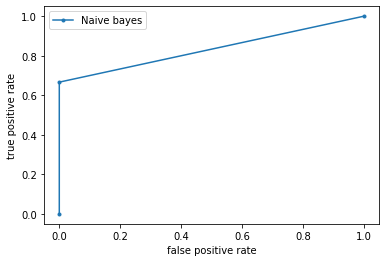

In [39]:
plt.plot(fpr,tpr,marker = '.',label = 'Naive bayes')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend()
plt.show()